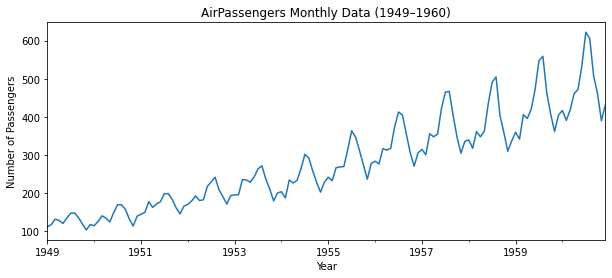

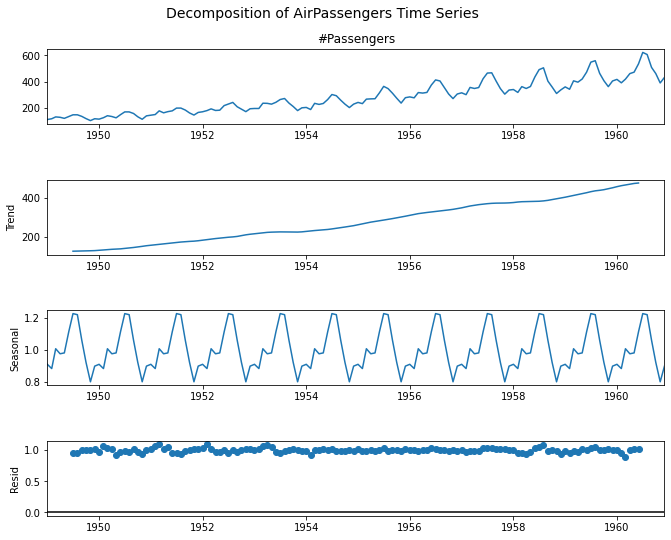

In [4]:
#1.Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application. 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = "/mnt/data/AirPassengers.csv"
data = pd.read_csv(r"C:\Users\rdsde\Downloads\AirPassengers.csv")

# Convert Month column to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Create a time series
ts = data['#Passengers']

# Plot original series
plt.figure(figsize=(10,4))
ts.plot(title="AirPassengers Monthly Data (1949–1960)")
plt.ylabel("Number of Passengers")
plt.xlabel("Year")
plt.show()

# Decompose the series (multiplicative model)
result = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot decomposition (trend, seasonality, residual)
fig = result.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Decomposition of AirPassengers Time Series", fontsize=14)
plt.show()


Available columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


C:\Users\rdsde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


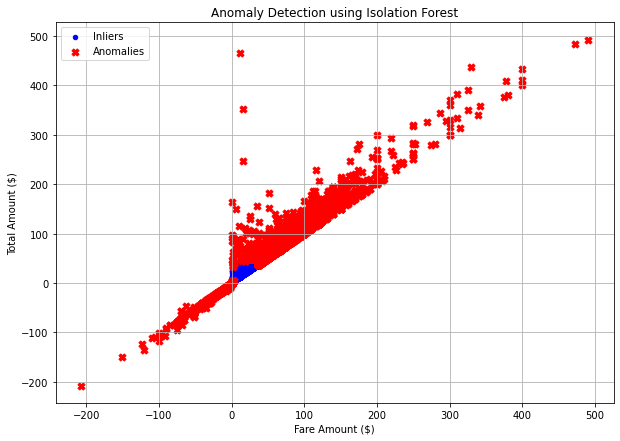

Anomaly detection complete. The plot 'anomaly_detection_scatter_plot.png' has been saved.
Total anomalies detected: 22592


In [7]:
#2.Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot. 
import numpy as np 
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\rdsde\Downloads\NYC_taxi_fare_data.csv")

    # Check available columns
    print("Available columns:", df.columns.tolist())

    # Use only required features (adjust names if different in your dataset)
    features = ['fare_amount', 'total_amount']
    if not all(col in df.columns for col in features):
        raise ValueError("One or both feature columns not found in dataset. Please rename them correctly.")

    # Drop missing values
    df_selected = df[features].dropna()

    # Initialize and fit Isolation Forest
    model = IsolationForest(contamination=0.05, random_state=42)
    df.loc[df_selected.index, 'anomaly'] = model.fit_predict(df_selected)

    # Separate anomalies and inliers
    anomalies = df[df['anomaly'] == -1]
    inliers = df[df['anomaly'] == 1]

    # Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(inliers['fare_amount'], inliers['total_amount'], c='blue', s=20, label='Inliers')
    plt.scatter(anomalies['fare_amount'], anomalies['total_amount'], c='red', s=50, label='Anomalies', marker='X')
    plt.title('Anomaly Detection using Isolation Forest')
    plt.xlabel('Fare Amount ($)')
    plt.ylabel('Total Amount ($)')
    plt.legend()
    plt.grid(True)
    plt.savefig('anomaly_detection_scatter_plot.png')
    plt.show()

    print("Anomaly detection complete. The plot 'anomaly_detection_scatter_plot.png' has been saved.")
    print(f"Total anomalies detected: {len(anomalies)}")

except FileNotFoundError:
    print("Error: The file 'NYC_taxi_fare_data.csv' was not found.")
    print("Please ensure the file is correctly provided and retry.")
except ValueError as e:
    print("Error:", e)


  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.33 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.18 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.41 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.25 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.22 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.41 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.05 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.03 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.93 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.14 sec
 ARIMA(2,1,0)(0,1,0)[12

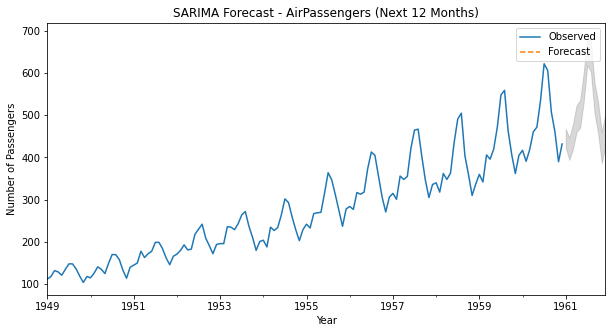

In [18]:
#3.: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results. 
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm

# Load dataset (make sure path is correct on your system)
data = pd.read_csv(r"C:\Users\rdsde\Downloads\AirPassengers.csv")

# Fix column names if needed
data.columns = data.columns.str.strip()   # remove extra spaces
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Ensure the time series column is numeric
ts = pd.to_numeric(data.iloc[:, 0], errors='coerce')

# Fit SARIMA using auto_arima
model_auto = pm.auto_arima(ts,
                           seasonal=True,
                           m=12,               # seasonality = 12 months
                           stepwise=True,      # makes it more stable
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True)

print(model_auto.summary())

# Forecast next 12 months
n_periods = 12
forecast, conf_int = model_auto.predict(n_periods=n_periods, return_conf_int=True)

# Build forecast index
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1),
                               periods=n_periods, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot observed + forecast
plt.figure(figsize=(10,5))
ts.plot(label='Observed')
forecast_series.plot(label='Forecast', linestyle='--')
plt.fill_between(forecast_index, conf_int[:,0], conf_int[:,1], 
                 color='gray', alpha=0.3)
plt.title("SARIMA Forecast - AirPassengers (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


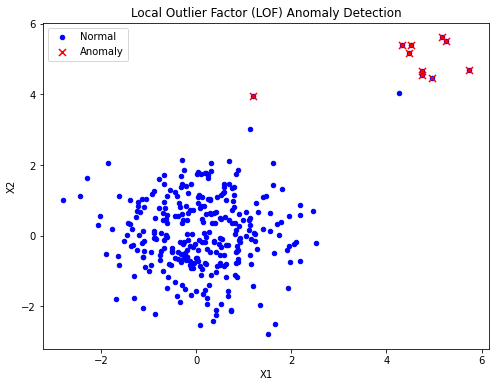

In [17]:
#4. : Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(1)
X1 = np.random.normal(0, 1, 300)
X2 = np.random.normal(0, 1, 300)

# Add cluster of anomalies
X1 = np.concatenate([X1, np.random.normal(5, 0.5, 10)])
X2 = np.concatenate([X2, np.random.normal(5, 0.5, 10)])

df = pd.DataFrame({'x1': X1, 'x2': X2})

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x1','x2']])

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
df['outlier'] = lof.fit_predict(X_scaled)  # -1 = outlier, 1 = normal

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(df['x1'], df['x2'], c='blue', s=20, label='Normal')
plt.scatter(df.loc[df['outlier']==-1, 'x1'],
            df.loc[df['outlier']==-1, 'x2'],
            c='red', s=50, marker='x', label='Anomaly')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.legend()
plt.show()

